In [1]:
import tensorflow as tf

2022-11-15 05:34:32.029770: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from tensorflow import keras

In [5]:
from tensorflow.keras.preprocessing.image import load_img

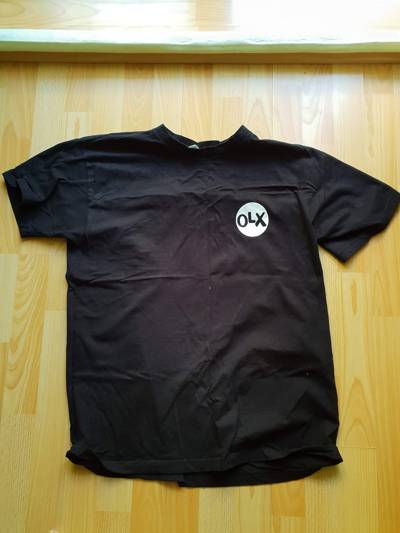

In [6]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [7]:
img = load_img(fullname, target_size=(299, 299))

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-11-15 05:36:08.875091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 05:36:08.881574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 05:36:08.882204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 05:36:08.883146: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

91884032/91884032 [==============================] - 3s 0us/step


In [11]:
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

2022-11-15 05:36:44.588416: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-15 05:36:45.314766: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-15 05:36:45.315700: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-15 05:36:45.315740: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-15 05:36:45.316728: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-15 05:36:45.316815: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [15]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

## 8.4 Convolutional neural networks

- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Tranfser learning

- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X, y = next(train_ds)

In [20]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


83683744/83683744 [==============================] - 2s 0us/step


In [38]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [39]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [41]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 12s 122ms/step - loss: 0.2571 - accuracy: 0.9100 - val_loss: 0.8242 - val_accuracy: 0.8065
Epoch 2/10
96/96 [==============================] - 12s 122ms/step - loss: 0.2007 - accuracy: 0.9302 - val_loss: 0.9142 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 12s 123ms/step - loss: 0.1457 - accuracy: 0.9478 - val_loss: 0.8962 - val_accuracy: 0.7742
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.1224 - accuracy: 0.9596 - val_loss: 0.9726 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.0925 - accuracy: 0.9716 - val_loss: 0.9715 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.0598 - accuracy: 0.9817 - val_loss: 0.9065 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.0537 - accuracy: 0.9860 - val_loss: 0.9401 - val_accuracy: 0.8182

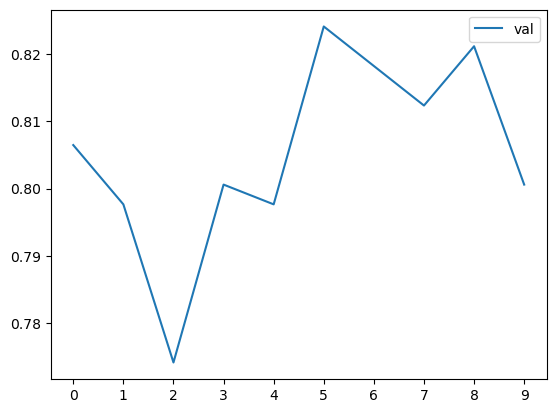

In [47]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

- What's the learning rate
- Trying different values

In [48]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [49]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 132ms/step - loss: 1.8157 - accuracy: 0.4182 - val_loss: 1.5593 - val_accuracy: 0.5044
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 1.3370 - accuracy: 0.5841 - val_loss: 1.2403 - val_accuracy: 0.5982
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 1.1168 - accuracy: 0.6538 - val_loss: 1.0704 - val_accuracy: 0.6628
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.9850 - accuracy: 0.6952 - val_loss: 0.9633 - val_accuracy: 0.7067
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.8962 - accuracy: 0.7168 - val_loss: 0.8880 - val_accuracy: 0.7243
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.8313 - accuracy: 0.7396 - val_loss: 0.8358 - val_accuracy: 0.7507
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.7792 - accuracy: 0.7536 - val_loss: 0.8056 - val_accuracy:

In [51]:
del scores[0.1]
del scores[0.0001]

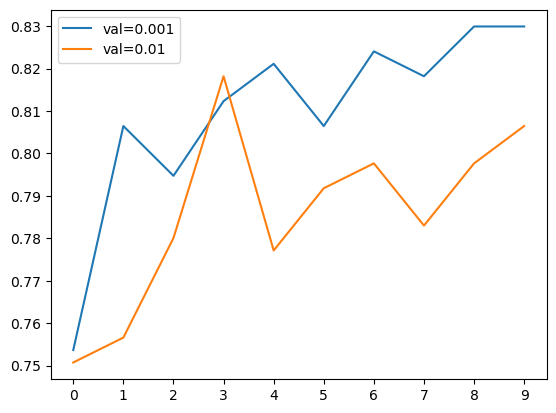

In [52]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [53]:
learning_rate = 0.001

## 8.7 Checkpointing

- Saving the best model only
- Training a model with callbacks


In [54]:
model.save_weights('model_v1.h5', save_format='h5')

In [55]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [56]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 15s 133ms/step - loss: 1.1225 - accuracy: 0.6268 - val_loss: 0.6959 - val_accuracy: 0.8123
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 0.6466 - accuracy: 0.7829 - val_loss: 0.6400 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 12s 127ms/step - loss: 0.5162 - accuracy: 0.8279 - val_loss: 0.5742 - val_accuracy: 0.8182
Epoch 4/10
96/96 [==============================] - 12s 125ms/step - loss: 0.4376 - accuracy: 0.8602 - val_loss: 0.5642 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 12s 126ms/step - loss: 0.3836 - accuracy: 0.8781 - val_loss: 0.5490 - val_accuracy: 0.8270
Epoch 6/10
96/96 [==============================] - 12s 126ms/step - loss: 0.3298 - accuracy: 0.9012 - val_loss: 0.5378 - val_accuracy: 0.8387
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.2960 - accuracy: 0.9182 - val_loss: 0.5154 - val_accuracy: 0.8358

## 8.8 Adding more layers

- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [57]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [58]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 15s 132ms/step - loss: 1.4736 - accuracy: 0.5352 - val_loss: 1.1791 - val_accuracy: 0.6334
Epoch 2/10
96/96 [==============================] - 12s 124ms/step - loss: 0.9834 - accuracy: 0.6780 - val_loss: 0.8700 - val_accuracy: 0.7331
Epoch 3/10
96/96 [==============================] - 12s 124ms/step - loss: 0.7049 - accuracy: 0.7819 - val_loss: 0.7384 - val_accuracy: 0.7830
Epoch 4/10
96/96 [==============================] - 12s 124ms/step - loss: 0.5755 - accuracy: 0.8207 - val_loss: 0.6897 - val_accuracy: 0.7683
Epoch 5/10
96/96 [==============================] - 12s 124ms/step - loss: 0.4684 - accuracy: 0.8556 - val_loss: 0.6306 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 12s 124ms/step - loss: 0.4034 - accuracy: 0.8843 - val_loss: 0.6157 - val_accuracy: 0.7947
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.3466 - accuracy: 0.8993 - val_loss: 0.6344 - val_accuracy: 0.8

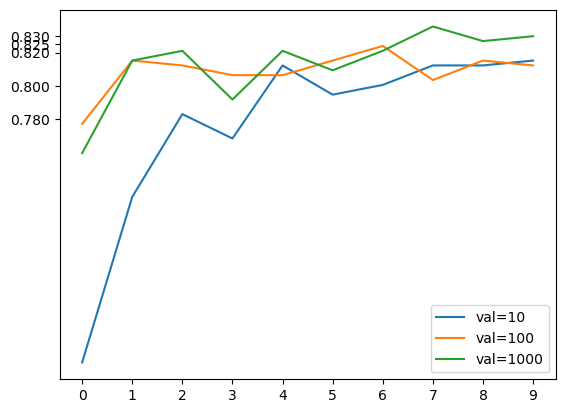

In [59]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [60]:
def make_model(learning_rate=0.01, size_inner=100, droprate= 0.2):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [61]:
learning_rate = 0.001
size = 100


scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate, 
        size_inner=size,
        droprate=droprate
    )
    
    
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 15s 130ms/step - loss: 0.9810 - accuracy: 0.6600 - val_loss: 0.6328 - val_accuracy: 0.7977
Epoch 2/30
96/96 [==============================] - 12s 123ms/step - loss: 0.5164 - accuracy: 0.8230 - val_loss: 0.5917 - val_accuracy: 0.7977
Epoch 3/30
96/96 [==============================] - 12s 123ms/step - loss: 0.3691 - accuracy: 0.8745 - val_loss: 0.5999 - val_accuracy: 0.7947
Epoch 4/30
96/96 [==============================] - 12s 124ms/step - loss: 0.2719 - accuracy: 0.9143 - val_loss: 0.5388 - val_accuracy: 0.8328
Epoch 5/30
96/96 [==============================] - 12s 122ms/step - loss: 0.1993 - accuracy: 0.9420 - val_loss: 0.6265 - val_accuracy: 0.7977
Epoch 6/30
96/96 [==============================] - 12s 124ms/step - loss: 0.1464 - accuracy: 0.9632 - val_loss: 0.5778 - val_accuracy: 0.8123
Epoch 7/30
96/96 [==============================] - 12s 123ms/step - loss: 0.0950 - accuracy: 0.9834 - val_loss: 0.6095 - val_accuracy: 0.

Epoch 28/30
96/96 [==============================] - 12s 124ms/step - loss: 0.0150 - accuracy: 0.9977 - val_loss: 0.8520 - val_accuracy: 0.8123
Epoch 29/30
96/96 [==============================] - 12s 123ms/step - loss: 0.0146 - accuracy: 0.9971 - val_loss: 0.8700 - val_accuracy: 0.8182
Epoch 30/30
96/96 [==============================] - 12s 124ms/step - loss: 0.0147 - accuracy: 0.9964 - val_loss: 0.8021 - val_accuracy: 0.8270


0.5
Epoch 1/30
96/96 [==============================] - 15s 132ms/step - loss: 1.3233 - accuracy: 0.5701 - val_loss: 0.7901 - val_accuracy: 0.7742
Epoch 2/30
96/96 [==============================] - 12s 122ms/step - loss: 0.8508 - accuracy: 0.7044 - val_loss: 0.6341 - val_accuracy: 0.8035
Epoch 3/30
96/96 [==============================] - 12s 124ms/step - loss: 0.6990 - accuracy: 0.7559 - val_loss: 0.5900 - val_accuracy: 0.8065
Epoch 4/30
96/96 [==============================] - 12s 122ms/step - loss: 0.6088 - accuracy: 0.7881 - val_loss: 0.6020 - val_accurac

Epoch 25/30
96/96 [==============================] - 12s 123ms/step - loss: 0.7249 - accuracy: 0.7200 - val_loss: 0.5664 - val_accuracy: 0.8152
Epoch 26/30
96/96 [==============================] - 12s 121ms/step - loss: 0.6880 - accuracy: 0.7298 - val_loss: 0.5713 - val_accuracy: 0.8035
Epoch 27/30
96/96 [==============================] - 12s 124ms/step - loss: 0.7018 - accuracy: 0.7256 - val_loss: 0.5738 - val_accuracy: 0.8094
Epoch 28/30
96/96 [==============================] - 12s 123ms/step - loss: 0.6822 - accuracy: 0.7321 - val_loss: 0.5756 - val_accuracy: 0.8328
Epoch 29/30
96/96 [==============================] - 12s 123ms/step - loss: 0.7051 - accuracy: 0.7207 - val_loss: 0.5704 - val_accuracy: 0.8065
Epoch 30/30
96/96 [==============================] - 12s 124ms/step - loss: 0.6864 - accuracy: 0.7275 - val_loss: 0.5737 - val_accuracy: 0.8299




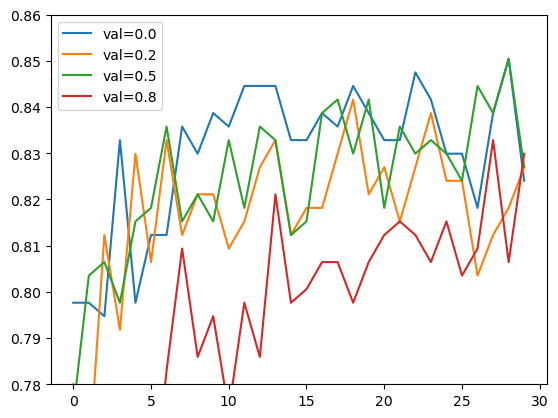

In [62]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

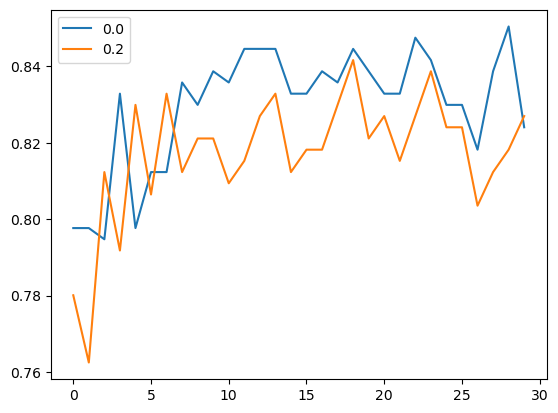

In [63]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

- Different data augmentations
- Training a model with augmentations
- How to select data augmentations?